In [3]:
#  I'll be using the folium package to render the data into a map in Jupyter.

import folium
import pandas as pd

# get the location information for this dataset
df = pd.read_csv('assets/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
display(my_map)

1. Import Libraries & Load Data

In [5]:
import pandas as pd
df = pd.read_csv('assets/data_2005_2015.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


2. Transform Data_Value column to Celsius

In [11]:
# In this code cell, transform the Data_Value column
# First, I'll transform the Data_Value column to Celsius, as it's likely in tenths of degrees Celsius.
# According to the hint, I'll filter the dataset to get only the rows with minimum and maximum temperatures.

# Convert Data_Value to degrees Celsius (from tenths of Celsius)
df['Data_Value_Celsius'] = df['Data_Value'] / 10

# Extract rows where Element is either TMAX or TMIN (maximum or minimum temperatures)
max_temp_df = df[df['Element'] == 'TMAX']
min_temp_df = df[df['Element'] == 'TMIN']

# Check the number of entries in each DataFrame
len_max_temp = len(max_temp_df)
len_min_temp = len(min_temp_df)

# Display the number of entries in each DataFrame
(len_max_temp, len_min_temp)


(83063, 82022)

Show the first few rows of the DataFrame after converting to Celsius

In [12]:
df[['ID', 'Date', 'Element', 'Data_Value', 'Data_Value_Celsius']].head()

,ID,Date,Element,Data_Value,Data_Value_Celsius
0,USW00094889,2014-11-12,TMAX,22,2.2
1,USC00208972,2009-04-29,TMIN,56,5.6
2,USC00200032,2008-05-26,TMAX,278,27.8
3,USC00205563,2005-11-11,TMAX,139,13.9
4,USC00200230,2014-02-27,TMAX,-106,-10.6


3. Data Processing

    a. Filter data for 2005-2014
    b. Filter data for 2015
    c. Group by day of the year for minimum and maximum temperatures.

In [ ]:
# Filter data for 2005 to 2014
df['Date'] = pd.to_datetime(df['Date'])
data_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]

# Filter data for 2015
data_2015 = df[df['Date'].dt.year == 2015]

# Create a new column to store "month-day" without year, so that it can be grouped by day
data_2005_2014['Month_Day'] = data_2005_2014['Date'].dt.strftime('%m-%d')
data_2015['Month_Day'] = data_2015['Date'].dt.strftime('%m-%d')

# Drop February 29th data since it only exists in leap years
data_2005_2014 = data_2005_2014[data_2005_2014['Month_Day'] != '02-29']
data_2015 = data_2015[data_2015['Month_Day'] != '02-29']

# Group by 'Month_Day' and calculate minimum and maximum temperatures from 2005 to 2014
min_temps_2005_2014 = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value_Celsius'].min()
max_temps_2005_2014 = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value_Celsius'].max()

# Group by 'Month_Day' for 2015 data
min_temps_2015 = data_2015[data_2015['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value_Celsius'].min()
max_temps_2015 = data_2015[data_2015['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value_Celsius'].max()

# Show first few results to verify data
min_temps_2005_2014.head(), max_temps_2005_2014.head(), min_temps_2015.head(), max_temps_2015.head()


In [9]:
# calculate the minimum and maximum values for the day of the year for 2005 through 2014
min_2005_2014 = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value_Celsius'].min()
max_2005_2014 = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value_Celsius'].max()
# calculate the minimum and maximum values for the years 2015
min_2015 = data_2015[data_2015['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value_Celsius'].min()
max_2015 = data_2015[data_2015['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value_Celsius'].max()
# Verify the number of observations (must be 365 observations for each DataFrame)
(len(min_2005_2014), len(max_2005_2014), len(min_2015), len(max_2015))

(365, 365, 365, 365)

4. Visualize the Data

    a. Plot min/max temperatures from 2005-2014.
    b. Scatter plot temperature anomalies for 2015.

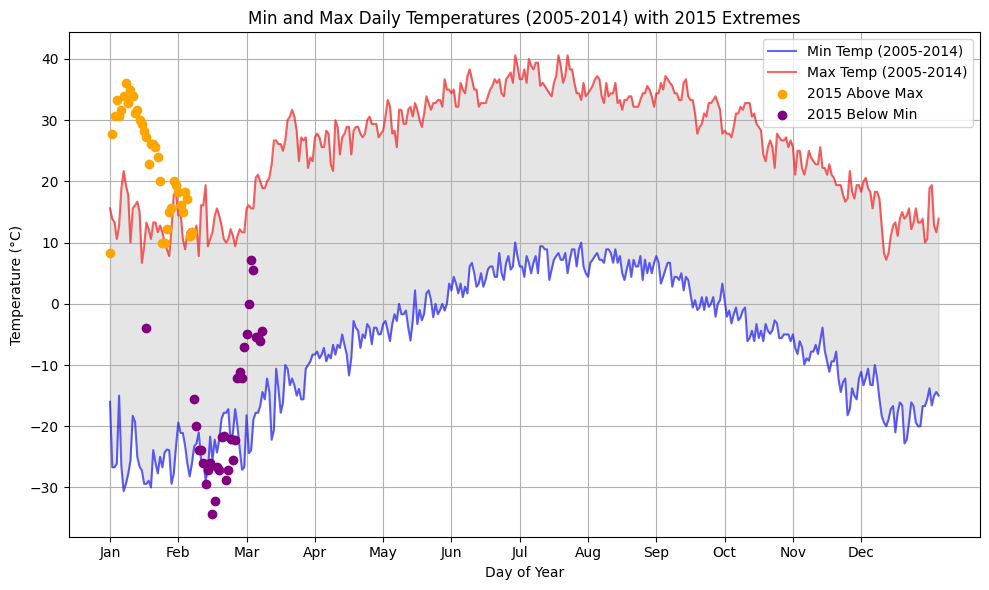

In [10]:
import matplotlib.pyplot as plt
from calendar import month_abbr

# List to store short month names (e.g., Jan, Feb, Mar, ...)
months = [month_abbr[i] for i in range(1, 13)]

# Create a figure and axis for plotting
plt.figure(figsize=(10, 6))

# Plot minimum and maximum temperatures (2005-2014)
plt.plot(min_2005_2014.values, label='Min Temp (2005-2014)', color='blue', alpha=0.6)
plt.plot(max_2005_2014.values, label='Max Temp (2005-2014)', color='red', alpha=0.6)

# Find the 2015 temperatures that exceed the maximum or fall below the minimum
exceeds_max = max_2015[max_2015 > max_2005_2014]
below_min = min_2015[min_2015 < min_2005_2014]

# Shade the area between the minimum and maximum lines
plt.fill_between(range(len(min_2005_2014)), min_2005_2014.values, max_2005_2014.values, color='grey', alpha=0.2)

# Scatter plot for 2015 temperatures that exceed limits
plt.scatter(exceeds_max.index, exceeds_max.values, color='orange', label='2015 Above Max', zorder=3)
plt.scatter(below_min.index, below_min.values, color='purple', label='2015 Below Min', zorder=3)

# Plot formatting
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Min and Max Daily Temperatures (2005-2014) with 2015 Extremes')
plt.xticks(range(0, 365, 30)[:-1], months)  # Remove the last tick to match 12 month labels
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
